In [1]:
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import numpy as np
import scipy.integrate as i
import scipy.linalg as sla
import random as rdm
from scipy.integrate import solve_ivp

## Task 4/5: Chaotic dynamics

## 1 Logistic map

### 1.1 Logistic map iteration rule

In [2]:
def logistic_map(x0 = 0.6, iterations = 50, r = 1.5):
    x = np.zeros(iterations + 1)
    x[0] = x0
    for n in range(iterations):
        x[n+1] = r*x[n]*(1-x[n])
    return x

### 1.2 Plots for r = (0,2)

<ipython-input-3-e79ac01af66c>:13: RuntimeWarning: divide by zero encountered in true_divide
  rfun = (r_values-1)/r_values


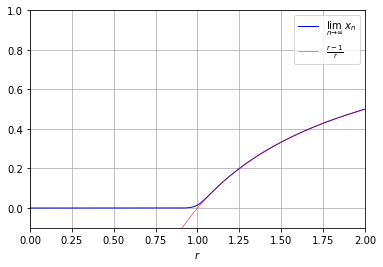

In [3]:
#Plot Bifurcation diagram 
r_number = 300
r_values = np.linspace(0, 2, r_number)
x_converged = np.zeros(r_number)

for n in range(r_number):
    #Approximating the limit value by a finite number of iterations
    x = logistic_map(x0 = 0.5, iterations = 60, r = r_values[n])
    #Taking the last value as limit value
    x_converged[n] = x[-1]

#Plot the limit values over the parameter r and add the plot of (r-1)/r
rfun = (r_values-1)/r_values
plt.xlim(0,2)
plt.ylim(-0.1,1)
plt.xlabel("$r$")
plt.grid()
plt.plot(r_values, x_converged, 'b', linewidth=1, label=r"$\lim_{n \to \infty} \: x_n$")
plt.plot(r_values, rfun, 'r', linewidth=0.5, label = r"$\frac{r-1}{r}$")
plt.legend()
plt.show

#Save figure
plt.savefig('task4/task4_logmap_r02c.png')

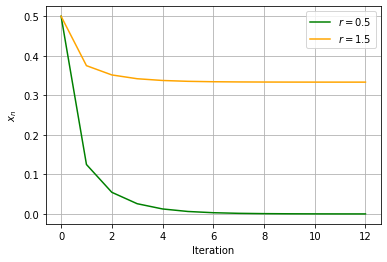

In [4]:
#Plot x[n] over the the Iterations n for r=0.5 and r=1.5 with x0=0.5 and 12 Iterations
r_number = 2
r_values = np.linspace(0.5, 1.5, r_number)

#Compute and plot for r=0.5
x1 = logistic_map(x0 = 0.5, iterations = 12, r = r_values[0])
plt.plot(range(13), x1, 'g', label = "$r = 0.5$")

#Compute and plot for r=1.5
x2 = logistic_map(x0 = 0.5, iterations = 12, r = r_values[1])
plt.plot(range(13), x2, 'orange', label="$r = 1.5$")

#Settings of plot
plt.xlabel("Iteration")
plt.ylabel("$x_n$")
plt.grid()
plt.legend()
plt.show

#Save figure
plt.savefig('task4/task4_logmap_r02_traj.png')

### 1.3 Plots for r = (2,4)

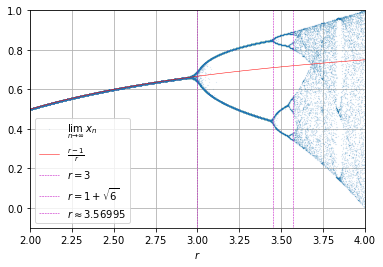

In [5]:
#Plot bifurcation diagram
r_number = 40000
r_values = [np.random.uniform(2,4) for _ in range(r_number)] 
x_converged = np.zeros(r_number)

for n in range(r_number):
    #Approximating the limit value by a finite number of iterations
    x = logistic_map(x0 = rdm.random(), iterations = 60, r = r_values[n])
    #Taking the last value as limit value
    x_converged[n] = x[-1]

#Compute the (r-1)/r function 
r_values_mon = np.linspace(2, 4, r_number)
rfun = (r_values_mon-1)/r_values_mon

#Plot and settings of plot 
plt.xlim(2,4)
plt.ylim(-0.1,1)
plt.xlabel("$r$")
plt.grid()
plt.plot(r_values, x_converged, '.', markersize=0.1, linewidth=None, markerfacecolor='green' ,label=r"$\lim_{n \to \infty} \: x_n$")
plt.plot(r_values_mon, rfun, 'r', linewidth=0.5, label = r"$\frac{r-1}{r}$")

#Insert vertical lines to separate characteristic intervals
plt.axvline(x=3, ymin=-0.1, ymax=1, linestyle='--', label='$r=3$', color='m',  linewidth=0.5)
plt.axvline(x=1+np.sqrt(6), ymin=-0.1, ymax=1, linestyle='--', label="$r=1+\sqrt{6}$", color='m', linewidth=0.5)
plt.axvline(x=3.56995, ymin=-0.1, ymax=1, linestyle='--', label=r"$r \approx 3.56995$", color='m', linewidth=0.5)
plt.legend()
plt.show

#Save figure 
plt.savefig('task4/task4_logmap_r24.png')

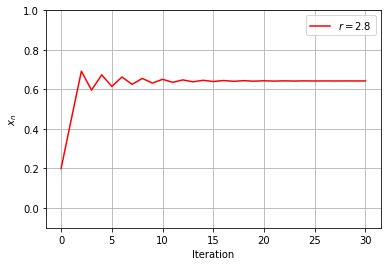

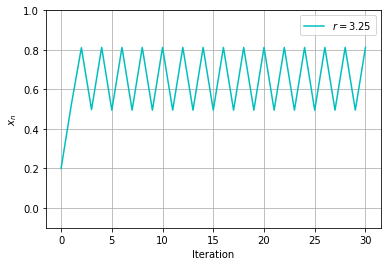

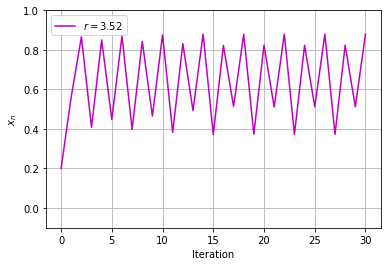

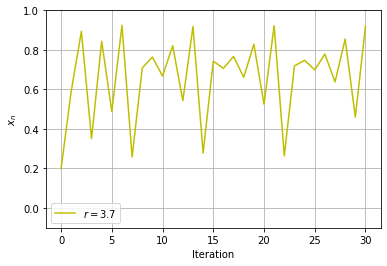

In [6]:
#Compute x[n] over n for four different values of r 
r_values = np.array([2.8, 3.25, 3.52, 3.7])
color = ['r', 'c', 'm', 'y']
for n in range(4):
    x = logistic_map(x0 = 0.2, iterations = 30, r = r_values[n])
    plt.figure()
    plt.ylim(-0.1 ,1)
    plt.grid()
    plt.plot(range(31), x, color[n], label = "$r =$"+str(r_values[n]))
    plt.xlabel("Iteration")
    plt.ylabel("$x_n$")
    plt.legend()
    plt.show
    plt.savefig(str('task4/task4_logmap_r24_traj'+str(n+1)+'.png'))

### 1.4 Sensesivity to variation of the initial value durch the chaotic bifurcation 

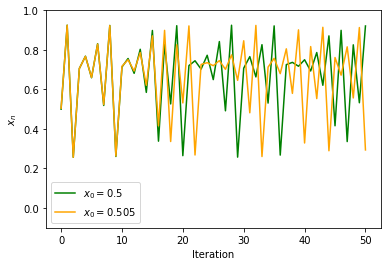

In [7]:
#Plot x[n] over the Iteration n for slightly different values of x0 and a parameter r from the interval with chaos behaviour  
x_0 = [0.5, 0.5+0.005]
color = ['g', 'orange']
for n in range(2):
    x = logistic_map(x0 = x_0[n], iterations = 50, r = 3.7)
    plt.ylim(-0.1 ,1)
    plt.plot(range(51), x, color[n], label = "$x_0 =$"+str(x_0[n]))
    plt.grid()
    plt.xlabel("Iteration")
    plt.ylabel("$x_n$")
    plt.legend()
    plt.show
    plt.savefig('task4/task4_logmap_r3.7_traj.png')

### 1.5 Plot bifurcation diagram for r = (0;4]

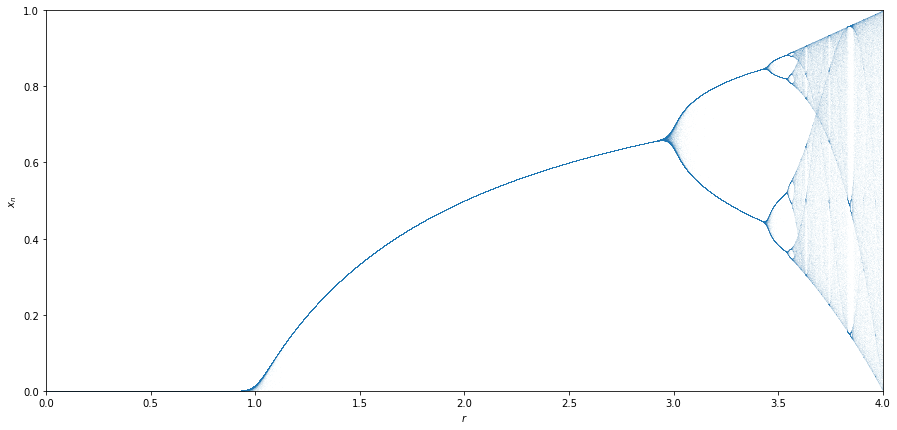

In [8]:
#Initialize r and x values
r_number = 1000000
r_values = [np.random.uniform(0,4) for _ in range(r_number)] 
x_converged = np.zeros(r_number)

#Compute the limit values of x[n]
for n in range(r_number):
    x = logistic_map(x0 = rdm.random(), iterations = 60, r = r_values[n])
    x_converged[n] = x[-1]

#Plot bifurcation diagram
plt.figure(figsize=(15, 7))
plt.plot(r_values, x_converged, '^', alpha=0.4, markersize = 0.013)
plt.axis('on')
plt.xlim(0,4)
plt.ylim(0,1)
plt.xlabel("$r$")
plt.ylabel("$x_n$")
plt.show

#save figure
plt.savefig('task4/task4_bifurcation_black.png')

## 2 Lorenz attractor

In [9]:
#Initialize model of the lorenz attractor
def modelLorenz(t, x, sigma, rho, beta):
    X, Y, Z = x[:]
    dxdt = sigma*(Y-X)
    dydt = X*(rho-Z)-Y 
    dzdt = X*Y-beta*Z
    return [dxdt, dydt, dzdt]

### 2.1 Single trajectroy of lorenz attractor with initial value x_0 = [10, 10, 10] 

In [10]:
#Setting the parameters 
t_0 = 0
t_end = 1000
dt = 0.01
NT = int((t_end-t_0)/dt)
time = np.linspace(t_0,t_end,NT)
x_01 = [10, 10, 10]
sigma = 10
rho =28
beta = 8/3

#Solving the differential equation system of the lorenz attractor 
sol1 = solve_ivp(modelLorenz, t_span=[t_0, t_end], y0=x_01, t_eval=time, args=(sigma, rho, beta), method='LSODA', rtol=1e-8, atol=1e-8)


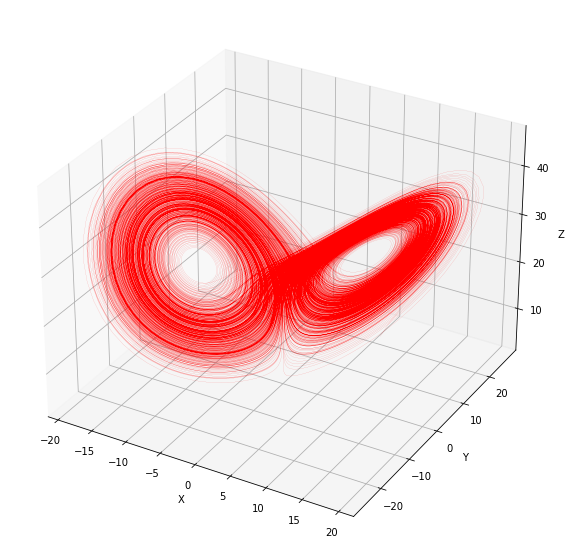

In [11]:
#Plot of the solution trajectory 
fig, ax = plt.subplots(1, 1, figsize=(10, 10), subplot_kw=dict(projection='3d'))
n = 1
ax.plot(sol1.y[0][::n], sol1.y[1][::n], sol1.y[2][::n], linewidth=0.07, color='r')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
fig.savefig("task4/task4_lorenz_x01.png")

### 2.2 Compare two trajectories with slightly changed initial values   

In [12]:
#Second initial value
x_02 = [10+1e-8, 10, 10]

#Solve the differential equation system
sol2 = solve_ivp(modelLorenz, t_span=[t_0, t_end], y0=x_02, t_eval=time, args=(sigma, rho, beta), method='LSODA', rtol=1e-8, atol=1e-8)


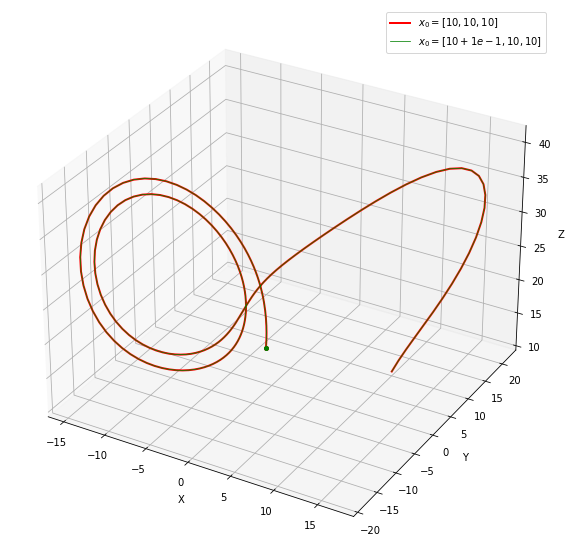

In [13]:
#Plot trajectories for t=2s
fig, ax = plt.subplots(1, 1, figsize=(10, 10), subplot_kw=dict(projection='3d'))
n = 1
ax.plot(sol1.y[0][0:200], sol1.y[1][0:200], sol1.y[2][0:200], linewidth=2, color='r', label = "$x_0 = [10, 10, 10]$")
ax.plot(sol2.y[0][0:200], sol2.y[1][0:200], sol2.y[2][0:200], linewidth=0.75, color='g', label = "$x_0 = [10+1e-1, 10, 10]$")
ax.plot(sol1.y[0][199], sol1.y[1][199], sol1.y[2][199], '.', markersize=8, color='r') 
ax.plot(sol2.y[0][199], sol2.y[1][199], sol2.y[2][199], '.', markersize=8, color='g')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()

#Save figure
fig.savefig("task4/task4_lorenz_x012_2.png")

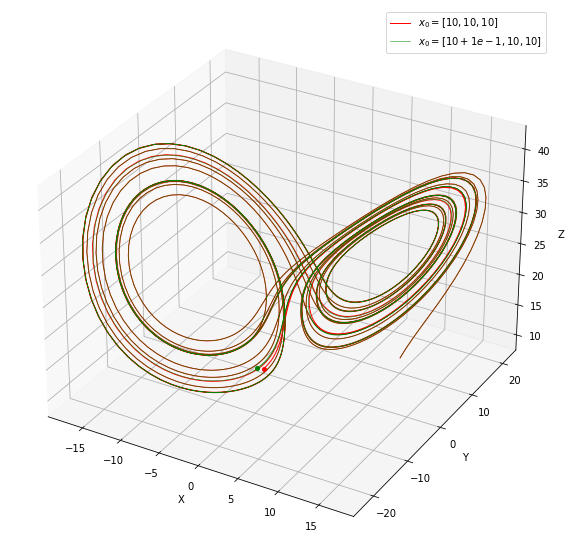

In [14]:
#Plot trajectories for t=21s
fig, ax = plt.subplots(1, 1, figsize=(10, 10), subplot_kw=dict(projection='3d'))
n = 1
ax.plot(sol1.y[0][0:2120], sol1.y[1][0:2120], sol1.y[2][0:2120], linewidth=1, color='r', label = "$x_0 = [10, 10, 10]$")
ax.plot(sol2.y[0][0:2120], sol2.y[1][0:2120], sol2.y[2][0:2120], linewidth=0.5, color='g', label = "$x_0 = [10+1e-1, 10, 10]$")
ax.plot(sol1.y[0][2119], sol1.y[1][2119], sol1.y[2][2119], '.', markersize=8, color='r') 
ax.plot(sol2.y[0][2119], sol2.y[1][2119], sol2.y[2][2119], '.', markersize=8, color='g')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()

#Save figure
fig.savefig("task4/task4_lorenz_x012_21.png")

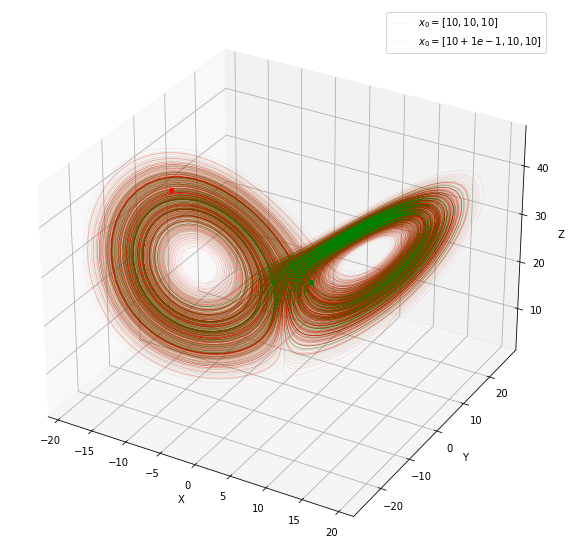

In [15]:
#Plot trajectory for t=1000s
fig, ax = plt.subplots(1, 1, figsize=(10, 10), subplot_kw=dict(projection='3d'))
n = 1
ax.plot(sol1.y[0][::n], sol1.y[1][::n], sol1.y[2][::n], linewidth=0.06, color='r', label = "$x_0 = [10, 10, 10]$")
ax.plot(sol2.y[0][::n], sol2.y[1][::n], sol2.y[2][::n], linewidth=0.03, color='g', label = "$x_0 = [10+1e-1, 10, 10]$")
ax.plot(sol1.y[0][-1], sol1.y[1][-1], sol1.y[2][-1], '.', markersize=8, color='r') 
ax.plot(sol2.y[0][-1], sol2.y[1][-1], sol2.y[2][-1], '.', markersize=8, color='g')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()

#Save figure
fig.savefig("task4/task4_lorenz_x012_1000.png")

### 2.3 Measuring the time it takes the trajectories to go apart more than a distance of 1 

In [16]:
#Initialize time and distance
timestep = 0
distance = 0

#Search for the first timestep with distance larger 1
while distance <= 1:
    distance = np.sqrt((sol1.y[0][timestep]-sol2.y[0][timestep])**2 + (sol1.y[1][timestep]-sol2.y[1][timestep])**2 + (sol1.y[2][timestep]-sol2.y[2][timestep])**2)
    timestep +=1

#Print results    
print("Timesetps:", timestep)
print("Time:",timestep*dt,"s")
print("Distance:",distance)

Timesetps: 2120
Time: 21.2 s
Distance: 1.0811219021812943


### 2.4 Changing the parameter rho from 28 to 0.5

In [17]:
#Changing parameter rho
rho = 0.5

#Solving the systems again for the two initial values and with rho = 0.5
sol3 = solve_ivp(modelLorenz, t_span=[t_0, t_end], y0=x_01, t_eval=time, args=(sigma, rho, beta), method='LSODA', rtol=1e-8, atol=1e-8)
sol4 = solve_ivp(modelLorenz, t_span=[t_0, t_end], y0=x_02, t_eval=time, args=(sigma, rho, beta), method='LSODA', rtol=1e-8, atol=1e-8)

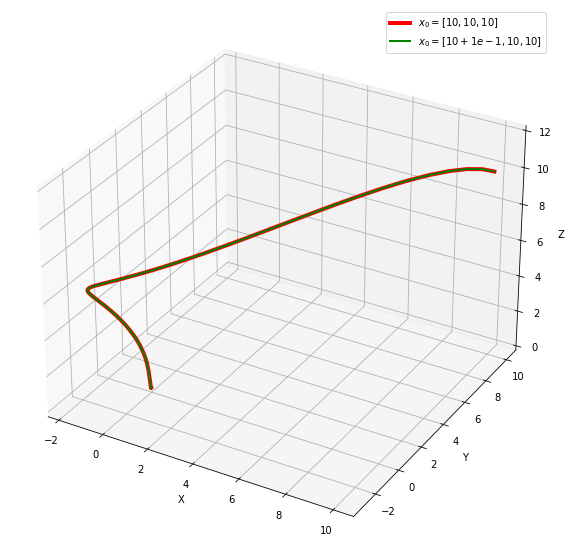

In [18]:
#Ploting the two trajectories for rho=0.5
fig, ax = plt.subplots(1, 1, figsize=(10, 10), subplot_kw=dict(projection='3d'))
n = 1
ax.plot(sol3.y[0][::n], sol3.y[1][::n], sol3.y[2][::n], linewidth=4, color='r', label="$x_0 = [10, 10, 10]$")
ax.plot(sol4.y[0][::n], sol4.y[1][::n], sol4.y[2][::n], linewidth=2, color='g', label="$x_0 = [10+1e-1, 10, 10]$")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()

#Save figure
fig.savefig("task4/task4_lorenz_x012_rho05.png")